In [275]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [276]:
os.getcwd()

'c:\\Users\\marci\\dev\\DAFT_0116_OTALORAMarcia\\Module_1\\Project_Week_3_Data-Preparation\\scripts'

In [277]:
df = pd.read_excel("../data/10 -Spain renting.xlsx") #Add None if reading all SHEETs in excel file

#### Getting basic info on type and Null values

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79749 entries, 0 to 79748
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Column1                    79749 non-null  int64  
 1   provincia                  79747 non-null  object 
 2   comunidad autonoma         79742 non-null  object 
 3   titulo                     79741 non-null  object 
 4   precio                     79745 non-null  float64
 5   habitaciones               76042 non-null  float64
 6   metros                     79734 non-null  object 
 7   total inmuebles/comunidad  79749 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.9+ MB


#### Showing main statistics

In [279]:
df.describe()

,Column1,precio,habitaciones,total inmuebles/comunidad
count,79749.000000,79745.000000,76042.000000,79749.000000
mean,39874.000000,1253.113223,2.476184,6342.473009
std,23021.697646,1660.283555,1.417935,6502.701913
min,0.000000,0.000000,0.000000,0.000000
25%,19937.000000,630.000000,2.000000,1465.000000
50%,39874.000000,900.000000,2.000000,3115.000000
75%,59811.000000,1360.000000,3.000000,9455.000000
max,79748.000000,100000.000000,230.000000,17589.000000


In [280]:
df.head()

,Column1,provincia,comunidad autonoma,titulo,precio,habitaciones,metros,total inmuebles/comunidad
0,0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
1,1,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751
2,2,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751
3,3,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751
4,4,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751


### 1st step : Standarizing columns names and dropping columns with No information

In [281]:
df.drop(labels="Column1", axis=1, inplace=True)

In [282]:
df.columns

Index(['provincia', 'comunidad autonoma', 'titulo', 'precio', 'habitaciones',
       'metros', 'total inmuebles/comunidad'],
      dtype='object')

In [283]:
df.rename(columns={'comunidad autonoma':"comunidad_autonoma", 'total inmuebles/comunidad':'total_inmuebles_p_comunidad'}, inplace=True)

In [284]:
df.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
1,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751
2,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751
3,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751
4,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751


### 2nd step: Check for Duplicated rows

In [285]:
perc_duplicated = df[df.duplicated()].shape[0]/df.shape[0]
print(f"{perc_duplicated*100:.2f} % of duplicated rows")

41.28 % of duplicated rows


In [286]:
df_nodup = df[~df.duplicated(keep="last")]
df_nodup.reset_index(drop=True,inplace=True)

In [287]:
df_nodup

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
1,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751
2,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751
3,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,Planta 4ª exterior con ascen,1751
4,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751
...,...,...,...,...,...,...,...
46820,Zaragoza,Aragon,"Piso en avenida De San Jose, 15, La Granja, Za...",890.0,3.0,90,1277
46821,Zaragoza,Aragon,"Piso en calle Del parque, 40, Pinares de Venec...",550.0,2.0,70,1277
46822,Zaragoza,Aragon,"Piso en callejón del Perro, 14, La Magdalena, ...",680.0,2.0,45,1277
46823,Zaragoza,Aragon,"Piso en calle Almagro, 10, Doctor Cerrada, Zar...",600.0,1.0,55,1277


### 3 Step : Some rows do not contain any information about a property ( no title, no price, no rooms, no surface). I assume it is a bad entry

In [288]:
df_nodup[(df_nodup["titulo"].isnull())&(df_nodup["precio"].isnull())&(df_nodup["habitaciones"].isnull())&(df_nodup["metros"].isnull())]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad
0,La Coruña,Galicia,NaN,NaN,NaN,NaN,1751
23074,Huesca,Aragon,NaN,NaN,NaN,NaN,260
46786,NaN,NaN,NaN,NaN,NaN,NaN,1277


### Dropping rows that do not have the fields 

In [289]:
df_nodup = df_nodup[~((df_nodup["titulo"].isnull())&(df_nodup["precio"].isnull())&(df_nodup["habitaciones"].isnull())&(df_nodup["metros"].isnull()))]
df_nodup.reset_index(inplace=True, drop=True)

### 4 step. Check how many NaNs per columns and which percentage

In [290]:
for col in df_nodup.columns:
    nancount = df[col].isnull().sum()
    print(nancount)
    print(f"Percantage of NaNs values for column: {col} is {100*(nancount/df_nodup.shape[0]):.2f}")

2
Percantage of NaNs values for column: provincia is 0.00
7
Percantage of NaNs values for column: comunidad_autonoma is 0.01
8
Percantage of NaNs values for column: titulo is 0.02
4
Percantage of NaNs values for column: precio is 0.01
3707
Percantage of NaNs values for column: habitaciones is 7.92
15
Percantage of NaNs values for column: metros is 0.03
0
Percantage of NaNs values for column: total_inmuebles_p_comunidad is 0.00


Only one columns with significative nan percentage --> Habitaciones (~%8). But this may not be so important for the price

### 5 Step Columns Metros is numeric but some entries  are a description so we need to filter these and correct

In [291]:
#First convert to string to check if float
df_nodup["metros"] = df_nodup["metros"].astype(str)

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\1760318247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["metros"] = df_nodup["metros"].astype(str)


In [364]:
def check_if_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [365]:
df_nodup["check_metros"] = df_nodup["metros"].apply(check_if_float)

In [366]:
df_nodup[df_nodup["check_metros"]==False].head(20)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,check_metros


Some of the fields in the "metros" column contain extra information such as elevator or additional details which may be useful for other users

In [325]:
def check_extra_info(x, colum_w_info = "metros", flag_column = "check_metros"):
    if x[flag_column]:
        textinfo = x[colum_w_info].strip() #Strippin any possible spaces before and after
        if "con ascen" in textinfo:
            return textinfo.split("con ascen")[0].strip()
        elif "sin ascen" in textinfo:
            return textinfo.split("sin ascen")[0].strip()
        else:
            return -1 #No info on elevator
    else:
        return -1 #No information


In [326]:
def check_if_ascensor(x, colum_w_info = "metros", flag_column = "check_metros"):
    if x[flag_column]:
        textinfo = x[colum_w_info].strip() #Strippin any possible spaces before and after
        if "con ascen" in textinfo:
            return 1
        elif "sin ascen" in textinfo:
            return 0
        else:
            return -1 #No info on elevator
    else:
        return -1 #No information


In [297]:
df_nodup["ascensor"] = df_nodup.apply(check_if_ascensor, args=("metros", "check_metros"), axis=1)

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\2948706090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["ascensor"] = df_nodup.apply(check_if_ascensor, args=("metros", "check_metros"), axis=1)


In [298]:
df_nodup["additional_info"] = df_nodup.apply(check_extra_info, args=("metros", "check_metros"), axis=1)

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\2207118648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["additional_info"] = df_nodup.apply(check_extra_info, args=("metros", "check_metros"), axis=1)


In [299]:
df_nodup["metros"] = np.where(df_nodup["check_metros"], df_nodup["metros"], np.nan)

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\635799031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodup["metros"] = np.where(df_nodup["check_metros"], df_nodup["metros"], np.nan)


In [369]:
def checking_separator(x):
    if np.isnan(x):
        return np.nan
    else:
        x= str(x)
        if len(x.split(".")[-1]) == 3:
                x.replace(".","") 
        return float(x)

In [370]:
df_nodup["metros"] = df_nodup["metros"].apply(lambda x: checking_separator(x))


In [371]:
df_nodup.head(20)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,check_metros
0,La Coruña,galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243.0,1751,-1,-1,"A Zapateira, Culleredo",chalet,pareado,4.526749,True
1,La Coruña,galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243.0,1751,-1,-1,"Elviña - A Zapateira, A Coruña",chalet,pareado,4.526749,True
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,-1,-1,"avenida Pasaxe, 35, Los Castros - Castrillón, ...",ático,NaN,NaN,True
3,La Coruña,galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100.0,1751,-1,-1,"calle de Fernando III o Santo, 9, Ensanche - S...",piso,NaN,10.000000,True
4,La Coruña,galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76.0,1751,-1,-1,"calle Manuel Jesús Méndez Búa, s/n, Carral",piso,NaN,5.921053,True
5,La Coruña,galicia,"Piso en Os Mallos, A Coruña",800.0,4.0,100.0,1751,-1,-1,"Os Mallos, A Coruña",piso,NaN,8.000000,True
6,La Coruña,galicia,"Piso en ronda de Outeiro, Agra del Orzán - Ven...",650.0,3.0,122.0,1751,-1,-1,"ronda de Outeiro, Agra del Orzán - Ventorrillo...",piso,NaN,5.327869,True
7,La Coruña,galicia,"Piso en travesía de Meicende, Suevos-Pastoriza...",400.0,4.0,107.0,1751,-1,-1,"travesía de Meicende, Suevos-Pastoriza, Arteixo",piso,NaN,3.738318,True
8,La Coruña,galicia,"Piso en calle Concepción Arenal, 50, Centro, F...",800.0,2.0,75.0,1751,-1,-1,"calle Concepción Arenal, 50, Centro, Ferrol",piso,NaN,10.666667,True
9,La Coruña,galicia,"Piso en calle da Pía, Castiñeiriño - Cruceiro ...",450.0,3.0,99.0,1751,-1,-1,"calle da Pía, Castiñeiriño - Cruceiro do Sar, ...",piso,NaN,4.545455,True


#### Step 6 Check most commont words in Title to check if there is classes already

First filter empty inputs where there is no title. Since there are only 4 rows we droppped them

In [327]:
df_nodup[df_nodup["titulo"].isnull()]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm


In [302]:
df_nodup = df_nodup[~df_nodup["titulo"].isnull()]
df_nodup.reset_index(inplace=True, drop=True)

In [303]:
df_nodup.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info
0,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751,True,-1,-1
1,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751,True,-1,-1
2,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,False,-1,-1
3,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751,True,-1,-1
4,La Coruña,Galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76,1751,True,-1,-1


We can extract type of property from the "titulo" column and the address

In [304]:
df_nodup["extract_type"]= df_nodup.apply(lambda x: x["titulo"].split(",")[0].split("en")[0].strip().lower(), axis=1)

In [305]:
df_nodup["extract_address"]= df_nodup.apply(lambda x: x["titulo"].split("en ")[-1].strip(), axis=1)

In [306]:
df_nodup["extract_type"]

0        chalet pareado
1        chalet pareado
2                 ático
3                  piso
4                  piso
              ...      
46813              piso
46814              piso
46815              piso
46816              piso
46817              piso
Name: extract_type, Length: 46818, dtype: object

In [307]:
df_nodup["extract_type"].unique()

array(['chalet pareado', 'ático', 'piso', 'dúplex', 'casa o chalet indep',
       'estudio', 'chalet adosado', 'chalet', 'casa rural',
       'casa de pueblo', 'finca rústica', 'casa terrera', 'torre',
       'masía', 'palacio', 'cortijo', 'casa rústica', 'caserón',
       'castillo'], dtype=object)

In [308]:
df_nodup["type_property_main"] = df_nodup["extract_type"].apply(lambda x: x.split()[0])
df_nodup["type_property_sec"] = df_nodup["extract_type"].apply(lambda x: x.split()[-1] if len(x.split())>1 else np.nan)


In [309]:
df_nodup

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,check_metros,ascensor,additional_info,extract_type,extract_address,type_property_main,type_property_sec
0,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751,True,-1,-1,chalet pareado,"A Zapateira, Culleredo",chalet,pareado
1,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751,True,-1,-1,chalet pareado,"Elviña - A Zapateira, A Coruña",chalet,pareado
2,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,False,-1,-1,ático,"avenida Pasaxe, 35, Los Castros - Castrillón, ...",ático,NaN
3,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751,True,-1,-1,piso,"calle de Fernando III o Santo, 9, Ensanche - S...",piso,NaN
4,La Coruña,Galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76,1751,True,-1,-1,piso,"calle Manuel Jesús Méndez Búa, s/n, Carral",piso,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46813,Zaragoza,Aragon,"Piso en avenida De San Jose, 15, La Granja, Za...",890.0,3.0,90,1277,True,-1,-1,piso,"avenida De San Jose, 15, La Granja, Zaragoza",piso,NaN
46814,Zaragoza,Aragon,"Piso en calle Del parque, 40, Pinares de Venec...",550.0,2.0,70,1277,True,-1,-1,piso,"calle Del parque, 40, Pinares de Venecia, Zara...",piso,NaN
46815,Zaragoza,Aragon,"Piso en callejón del Perro, 14, La Magdalena, ...",680.0,2.0,45,1277,True,-1,-1,piso,"callejón del Perro, 14, La Magdalena, Zaragoza",piso,NaN
46816,Zaragoza,Aragon,"Piso en calle Almagro, 10, Doctor Cerrada, Zar...",600.0,1.0,55,1277,True,-1,-1,piso,"calle Almagro, 10, Doctor Cerrada, Zaragoza",piso,NaN


In [310]:
df_nodup.drop(labels=["extract_type", "check_metros"],axis=1,inplace=True)

In [311]:
df_nodup.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec
0,La Coruña,Galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243,1751,-1,-1,"A Zapateira, Culleredo",chalet,pareado
1,La Coruña,Galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243,1751,-1,-1,"Elviña - A Zapateira, A Coruña",chalet,pareado
2,La Coruña,Galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,NaN,1751,-1,-1,"avenida Pasaxe, 35, Los Castros - Castrillón, ...",ático,NaN
3,La Coruña,Galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100,1751,-1,-1,"calle de Fernando III o Santo, 9, Ensanche - S...",piso,NaN
4,La Coruña,Galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76,1751,-1,-1,"calle Manuel Jesús Méndez Búa, s/n, Carral",piso,NaN


#### Check for un realistic meters per property

Text(0, 0.5, 'Mean meters per properties per comune')

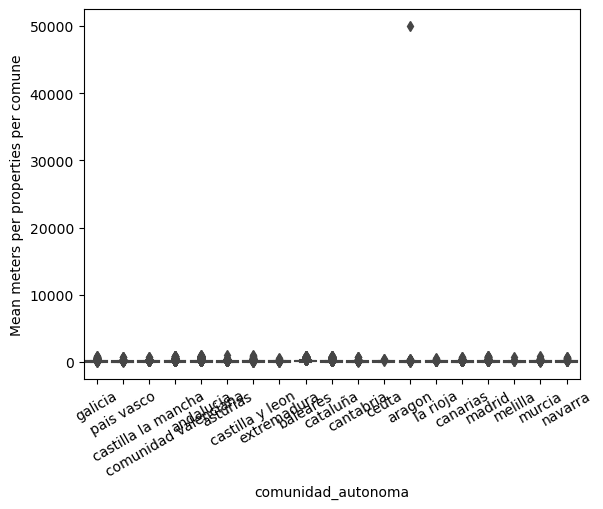

In [357]:
ax = sns.boxplot(data=df_nodup, x="comunidad_autonoma", y="metros")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel("Mean meters per properties per comune")

In France you cannot rent below 10m2

In [361]:
df_nodup[df_nodup["metros"]<10].head(30)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm
2372,Alicante,comunidad valenciana,"Casa o chalet independiente en Bruselas, Altea...",15000.0,6.0,1.060,3115,-1,-1,"Bruselas, Altea Hills, Altea",casa,indep,14150.943396
2581,Alicante,comunidad valenciana,"Casa o chalet independiente en Cometa-Carrió, ...",10000.0,6.0,1.089,3115,-1,-1,"Cometa-Carrió, Calpe",casa,indep,9182.736455
2813,Alicante,comunidad valenciana,"Casa o chalet independiente en Altea la Vella,...",14900.0,6.0,1.039,3115,-1,-1,"Altea la Vella, Altea",casa,indep,14340.712223
3146,Alicante,comunidad valenciana,"Casa o chalet independiente en Cometa-Carrió, ...",10000.0,5.0,1.089,3115,-1,-1,"Cometa-Carrió, Calpe",casa,indep,9182.736455
3492,Alicante,comunidad valenciana,"Piso en Ensanche-Diputación, Alicante / Alacant",6000.0,8.0,1.500,3115,-1,-1,"Ensanche-Diputación, Alicante / Alacant",piso,NaN,4000.000000
5277,Almeria,andalucia,"Finca rústica en cuesta Empedrada 04760, s/n, ...",2500.0,5.0,1.800,1345,-1,-1,"cuesta Empedrada 04760, s/n, Berja",finca,rústica,1388.888889
7674,Badajoz,extremadura,Casa o chalet independiente en calle Arroyo de...,1500.0,3.0,1.000,411,-1,-1,"calle Arroyo de la Pizarrilla, 20, Bodegones -...",casa,indep,1500.000000
7890,Islas Baleares,baleares,"Casa terrera en Son Castanyer, 846, Montuiri",2000.0,1.0,7.000,2317,-1,-1,"Son Castanyer, 846, Montuiri",casa,terrera,285.714286
8104,Islas Baleares,baleares,"Chalet en Manacor Centro, Manacor",23500.0,6.0,1.150,2317,-1,-1,"Manacor Centro, Manacor",chalet,NaN,20434.782609
8188,Islas Baleares,baleares,"Casa o chalet independiente en Manacor Centro,...",20900.0,6.0,1.200,2317,-1,-1,"Manacor Centro, Manacor",casa,indep,17416.666667


97 inputs with invalid surface. Most of them seem to have a valid input but error reading the separtor "."

In [372]:
df_nodup.metros = df_nodup.metros.astype(str)#(float)

In [374]:
df_nodup["metros"] = df_nodup["metros"].apply(lambda x: x.replace(".","") if len(x.split('.')[-1])==3 else x)

In [375]:
df_nodup.head(20)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,check_metros
0,La Coruña,galicia,"Chalet pareado en A Zapateira, Culleredo",1100.0,4.0,243.0,1751,-1,-1,"A Zapateira, Culleredo",chalet,pareado,4.526749,True
1,La Coruña,galicia,"Chalet pareado en Elviña - A Zapateira, A Coruña",1100.0,4.0,243.0,1751,-1,-1,"Elviña - A Zapateira, A Coruña",chalet,pareado,4.526749,True
2,La Coruña,galicia,"Ático en avenida Pasaxe, 35, Los Castros - Cas...",450.0,NaN,nan,1751,-1,-1,"avenida Pasaxe, 35, Los Castros - Castrillón, ...",ático,NaN,NaN,True
3,La Coruña,galicia,"Piso en calle de Fernando III o Santo, 9, Ensa...",1000.0,4.0,100.0,1751,-1,-1,"calle de Fernando III o Santo, 9, Ensanche - S...",piso,NaN,10.000000,True
4,La Coruña,galicia,"Piso en calle Manuel Jesús Méndez Búa, s/n, Ca...",450.0,2.0,76.0,1751,-1,-1,"calle Manuel Jesús Méndez Búa, s/n, Carral",piso,NaN,5.921053,True
5,La Coruña,galicia,"Piso en Os Mallos, A Coruña",800.0,4.0,100.0,1751,-1,-1,"Os Mallos, A Coruña",piso,NaN,8.000000,True
6,La Coruña,galicia,"Piso en ronda de Outeiro, Agra del Orzán - Ven...",650.0,3.0,122.0,1751,-1,-1,"ronda de Outeiro, Agra del Orzán - Ventorrillo...",piso,NaN,5.327869,True
7,La Coruña,galicia,"Piso en travesía de Meicende, Suevos-Pastoriza...",400.0,4.0,107.0,1751,-1,-1,"travesía de Meicende, Suevos-Pastoriza, Arteixo",piso,NaN,3.738318,True
8,La Coruña,galicia,"Piso en calle Concepción Arenal, 50, Centro, F...",800.0,2.0,75.0,1751,-1,-1,"calle Concepción Arenal, 50, Centro, Ferrol",piso,NaN,10.666667,True
9,La Coruña,galicia,"Piso en calle da Pía, Castiñeiriño - Cruceiro ...",450.0,3.0,99.0,1751,-1,-1,"calle da Pía, Castiñeiriño - Cruceiro do Sar, ...",piso,NaN,4.545455,True


In [376]:
df_nodup.metros = df_nodup.metros.astype(float)

In [379]:
df_nodup[df_nodup["metros"]<10]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,check_metros
2372,Alicante,comunidad valenciana,"Casa o chalet independiente en Bruselas, Altea...",15000.0,6.0,1.06,3115,-1,-1,"Bruselas, Altea Hills, Altea",casa,indep,14150.943396,True
3492,Alicante,comunidad valenciana,"Piso en Ensanche-Diputación, Alicante / Alacant",6000.0,8.0,1.50,3115,-1,-1,"Ensanche-Diputación, Alicante / Alacant",piso,NaN,4000.000000,True
5277,Almeria,andalucia,"Finca rústica en cuesta Empedrada 04760, s/n, ...",2500.0,5.0,1.80,1345,-1,-1,"cuesta Empedrada 04760, s/n, Berja",finca,rústica,1388.888889,True
7674,Badajoz,extremadura,Casa o chalet independiente en calle Arroyo de...,1500.0,3.0,1.00,411,-1,-1,"calle Arroyo de la Pizarrilla, 20, Bodegones -...",casa,indep,1500.000000,True
7890,Islas Baleares,baleares,"Casa terrera en Son Castanyer, 846, Montuiri",2000.0,1.0,7.00,2317,-1,-1,"Son Castanyer, 846, Montuiri",casa,terrera,285.714286,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40997,Toledo,castilla la mancha,Casa o chalet independiente en camino Retamoso...,2500.0,4.0,3.10,782,-1,-1,"camino Retamoso, 1, Torrecilla de la Jara",casa,indep,806.451613,True
41992,Valencia,comunidad valenciana,Casa o chalet independiente en Rocafort,10000.0,8.0,1.20,3711,-1,-1,Rocafort,casa,indep,8333.333333,True
42194,Valencia,comunidad valenciana,Casa o chalet independiente en calle Virgen de...,15000.0,7.0,1.00,3711,-1,-1,"de Covadonga, Gallipont, La Pobla de Vallbona",casa,indep,15000.000000,True
43011,Valencia,comunidad valenciana,Casa o chalet independiente en calle Santa Bár...,10000.0,9.0,1.18,3711,-1,-1,"calle Santa Bárbara, 26, Rocafort",casa,indep,8474.576271,True


In [377]:
df_nodup[df_nodup["metros"]>10000]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,check_metros
20324,Granada,andalucia,"Piso en carretera Granada, Güéjar-Sierra",5700.0,3.0,16991.0,3051,-1,-1,"carretera Granada, Güéjar-Sierra",piso,NaN,335.47172,True
23049,Huesca,aragon,"Piso en calle Escuelas, 10, Biscarrués",350.0,0.0,50000.0,260,-1,-1,"calle Escuelas, 10, Biscarrués",piso,NaN,0.00700,True


In [378]:
df_nodup[df_nodup["provincia"]=="Huesca"].sort_values(by="precio",ascending=True)

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,check_metros
23058,Huesca,aragon,"Dúplex en Urbanización Espata R5, 13, Villanúa",0.0,2.0,57.0,4444,-1,-1,"Urbanización Espata R5, 13, Villanúa",dúplex,NaN,0.000000,True
23055,Huesca,aragon,"Piso en calle de Francia, 12, Sallent de Gallego",0.0,4.0,122.0,260,-1,-1,"calle de Francia, 12, Sallent de Gallego",piso,NaN,0.000000,True
22966,Huesca,aragon,"Chalet en calle Balsa la Algayo, Tamarite de L...",200.0,3.0,18.0,260,-1,-1,"calle Balsa la Algayo, Tamarite de Litera",chalet,NaN,11.111111,True
23347,Huesca,andalucia,Casa o chalet independiente en calle Río Guada...,270.0,1.0,100.0,623,-1,-1,"calle Río Guadalete, 34, Martos",casa,indep,2.700000,True
23067,Huesca,aragon,"Estudio en calle Canton, 2, Poblaciones norte,...",280.0,NaN,NaN,260,-1,-1,"calle Canton, 2, Poblaciones norte, Jaca",estudio,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23020,Huesca,aragon,"Casa de pueblo en camino de los Plans, 10, Sal...",1900.0,3.0,120.0,260,-1,-1,"camino de los Plans, 10, Sallent de Gallego",casa,pueblo,15.833333,True
23013,Huesca,aragon,"Chalet adosado en calle la Iglesia, 3, Sallent...",2000.0,3.0,100.0,260,-1,-1,"calle la Iglesia, 3, Sallent de Gallego",chalet,adosado,20.000000,True
22978,Huesca,aragon,"Casa de pueblo en calle l'ausin, 10, Poblacion...",2000.0,3.0,100.0,260,-1,-1,"calle l'ausin, 10, Poblaciones norte, Jaca",casa,pueblo,20.000000,True
22900,Huesca,aragon,Casa o chalet independiente en camino de Saras...,2000.0,3.0,215.0,260,-1,-1,"camino de Saras, Panticosa",casa,indep,9.302326,True


### Step 6 Analyse data for outliers

In [337]:
df_nodup["comunidad_autonoma"] = df_nodup["comunidad_autonoma"].str.lower()

#### Show number of properties per comunidad

In [343]:
df_nodup.groupby("comunidad_autonoma").count().iloc[:,0].sort_values(ascending=False)

comunidad_autonoma
andalucia               11698
castilla y leon          4749
comunidad valenciana     4330
galicia                  3775
cataluña                 3284
canarias                 2648
baleares                 2256
pais vasco               2004
castilla la mancha       1999
murcia                   1936
madrid                   1773
asturias                 1752
aragon                   1644
cantabria                1254
extremadura               776
navarra                   447
la rioja                  359
melilla                   101
ceuta                      30
Name: provincia, dtype: int64

Text(0, 0.5, 'Number of properties per comune')

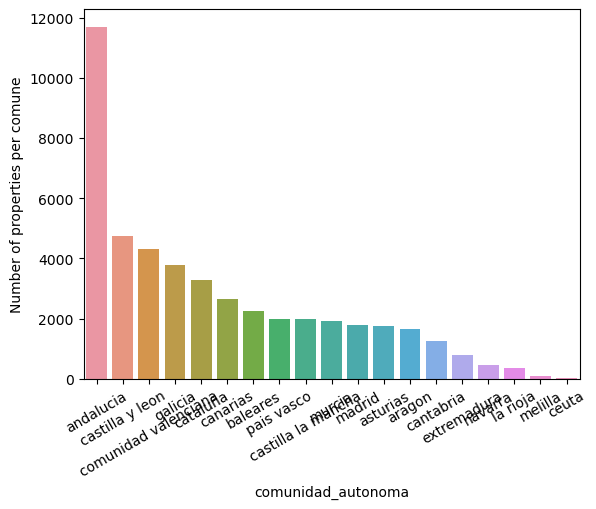

In [345]:
order_bars = df_nodup.groupby("comunidad_autonoma").count().iloc[:,0].sort_values(ascending=False).index
ax = sns.countplot(data=df_nodup, x="comunidad_autonoma",order=order_bars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_ylabel("Number of properties per comune")


### One entry possibly an outlier , we must check

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm
23049,Huesca,aragon,"Piso en calle Escuelas, 10, Biscarrués",350.0,0.0,50000.0,260,-1,-1,"calle Escuelas, 10, Biscarrués",piso,NaN,0.007


Since it is a flat ("piso") it is possible that this is a mistake in the inpyt of meters, specially for the price (350). We can eliminate the record since it is 1 in 260 or check other property values

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm
23058,Huesca,aragon,"Dúplex en Urbanización Espata R5, 13, Villanúa",0.0,2.0,57.0,4444,-1,-1,"Urbanización Espata R5, 13, Villanúa",dúplex,NaN,0.000000
23055,Huesca,aragon,"Piso en calle de Francia, 12, Sallent de Gallego",0.0,4.0,122.0,260,-1,-1,"calle de Francia, 12, Sallent de Gallego",piso,NaN,0.000000
22966,Huesca,aragon,"Chalet en calle Balsa la Algayo, Tamarite de L...",200.0,3.0,18.0,260,-1,-1,"calle Balsa la Algayo, Tamarite de Litera",chalet,NaN,11.111111
23347,Huesca,andalucia,Casa o chalet independiente en calle Río Guada...,270.0,1.0,100.0,623,-1,-1,"calle Río Guadalete, 34, Martos",casa,indep,2.700000
23067,Huesca,aragon,"Estudio en calle Canton, 2, Poblaciones norte,...",280.0,NaN,NaN,260,-1,-1,"calle Canton, 2, Poblaciones norte, Jaca",estudio,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23020,Huesca,aragon,"Casa de pueblo en camino de los Plans, 10, Sal...",1900.0,3.0,120.0,260,-1,-1,"camino de los Plans, 10, Sallent de Gallego",casa,pueblo,15.833333
23013,Huesca,aragon,"Chalet adosado en calle la Iglesia, 3, Sallent...",2000.0,3.0,100.0,260,-1,-1,"calle la Iglesia, 3, Sallent de Gallego",chalet,adosado,20.000000
22978,Huesca,aragon,"Casa de pueblo en calle l'ausin, 10, Poblacion...",2000.0,3.0,100.0,260,-1,-1,"calle l'ausin, 10, Poblaciones norte, Jaca",casa,pueblo,20.000000
22900,Huesca,aragon,Casa o chalet independiente en camino de Saras...,2000.0,3.0,215.0,260,-1,-1,"camino de Saras, Panticosa",casa,indep,9.302326


In [314]:
df_nodup.groupby([ "comunidad_autonoma","provincia","type_property_main"]).count().loc[:,["titulo"]].sort_values(by = "titulo",ascending=False)

titulo
comunidad_autonoma provincia   type_property_main        
Asturias           Asturias    piso                  1557
Castilla y Leon    Salamanca   piso                  1556
Murcia             Murcia      piso                  1438
Cataluña           Barcelona   piso                  1426
Andalucia          Granada     piso                  1423
...                                                   ...
Galicia            Lugo        palacio                  1
Castilla La Mancha Albacete    finca                    1
                               torre                    1
                   Ciudad Real caserón                  1
andalucia          Jaen        chalet                   1

[384 rows x 1 columns]

In [315]:
df_nodup.groupby([ "comunidad_autonoma","provincia","type_property_main"]).mean().sort_values(by="precio",ascending=False)

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\2628285569.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_nodup.groupby([ "comunidad_autonoma","provincia","type_property_main"]).mean().sort_values(by="precio",ascending=False)


,,,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info
comunidad_autonoma,provincia,type_property_main,,,,,,
Andalucia,Malaga,casa,9932.210345,4.500000,355.660341,3809.0,-1.0,-1.0
Cataluña,Barcelona,finca,9245.000000,8.000000,2.291000,9455.0,-1.0,-1.0
Madrid,Madrid,casa,6907.555556,5.688889,417.433333,17589.0,-1.0,-1.0
Baleares,Islas Baleares,casa,6293.164491,3.953003,294.977937,2317.0,-1.0,-1.0
Cataluña,Barcelona,casa,6169.882353,4.858824,359.707059,9455.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...
Andalucia,Huesca,casa,270.000000,1.000000,100.000000,623.0,-1.0,-1.0
Asturias,Asturias,finca,250.000000,2.000000,54.000000,2470.0,-1.0,-1.0
Cataluña,Tarragona,masía,200.000000,NaN,NaN,554.0,-1.0,-1.0


In [316]:
def outliers_3sigma(colvalue, meancol, stdcol):
    if (colvalue>(meancol+3*stdcol)) or (colvalue<(meancol-3*stdcol)):
        return 1
    else:
        return 0
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def outliers_IQR(columnvalues,q25,q75,iqr):
    if (columnvalues>(q75+1.5*iqr)) or (columnvalues<(q25-1.5*iqr)):
        return 1
    else:
        return 0
      

#### Identify outliers by comune by type

Standarize indicator precio_metro

In [317]:
df_nodup["precio_sqm"] = df_nodup.apply(lambda x: x["precio"]/x["metros"] if np.isfinite(x["metros"]) else np.nan, axis=1)

In [318]:
grouped_df =  df_nodup.groupby([ "comunidad_autonoma","type_property_main"])#.agg({"precio":[q1,q3]})


In [319]:
list_outliers = []
for igroup, gdf in grouped_df:
    q25 = q1(gdf["precio_sqm"])
    q75 = q3(gdf["precio_sqm"])
    iqr = q75 - q25
    mean_gdf = np.nanmean(gdf["precio_sqm"])
    std_gdf = np.nanstd(gdf["precio_sqm"])
    gdf["outliers_IQR"] = gdf["precio_sqm"].apply(outliers_IQR, args=(q25,q75,iqr))
    gdf["outliers_sigma"] = gdf["precio_sqm"].apply(outliers_3sigma, args=(mean_gdf,std_gdf))
    #print(gdf["outliers_IQR"])
    list_outliers.append(gdf)

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\3283279758.py:6: RuntimeWarning: Mean of empty slice
  mean_gdf = np.nanmean(gdf["precio_sqm"])
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\marci\AppData\Local\Temp\ipykernel_23344\3283279758.py:6: RuntimeWarning: Mean of empty slice
  mean_gdf = np.nanmean(gdf["precio_sqm"])
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\marci\AppData\Local\Temp\ipykernel_23344\3283279758.py:6: RuntimeWarning: Mean of empty slice
  mean_gdf = np.nanmean(gdf["precio_sqm"])
c:\Users\marci\.conda\envs\danalysis\lib\site-packages\numpy\lib\nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=a

In [320]:
df_outliers = pd.concat(list_outliers,axis=0)
df_outliers.head()

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,outliers_IQR,outliers_sigma
3989,Almeria,Andalucia,Casa o chalet independiente en Ciudad Quesada,900.0,2.0,140.0,1345,-1,-1,Ciudad Quesada,casa,indep,6.428571,0,0
4009,Almeria,Andalucia,Casa o chalet independiente en Playa de Ponien...,2200.0,3.0,278.0,1345,-1,-1,"Playa de Poniente, Benidorm",casa,indep,7.913669,0,0
4010,Almeria,Andalucia,Casa o chalet independiente en Urbanització Co...,799.0,3.0,75.0,1345,-1,-1,"Urbanització Copet, Coloma, La Nucia",casa,indep,10.653333,0,0
4018,Almeria,Andalucia,Casa o chalet independiente en avenida las Gol...,800.0,3.0,190.0,1345,-1,-1,"avenida las Golondrinas, Arboleas",casa,indep,4.210526,0,0
4037,Almeria,Andalucia,"Casa o chalet independiente en Atarazanas, 48,...",550.0,2.0,70.0,1345,-1,-1,"Atarazanas, 48, Cabo de Gata",casa,indep,7.857143,0,0


In [321]:
df_outliers[df_outliers["outliers_IQR"] ==1]

,provincia,comunidad_autonoma,titulo,precio,habitaciones,metros,total_inmuebles_p_comunidad,ascensor,additional_info,extract_address,type_property_main,type_property_sec,precio_sqm,outliers_IQR,outliers_sigma
4097,Almeria,Andalucia,"Casa o chalet independiente en sureste, Aguama...",28000.0,6.0,745.0,1345,-1,-1,"sureste, Aguamarga, Nijar",casa,indep,37.583893,1,0
12686,Cadiz,Andalucia,Casa o chalet independiente en Los Gallos - La...,2000.0,2.0,50.0,2396,-1,-1,"Los Gallos - La Coquina, Chiclana de la Frontera",casa,indep,40.000000,1,0
12696,Cadiz,Andalucia,Casa o chalet independiente en Sotogrande Cost...,12500.0,6.0,350.0,2396,-1,-1,"Sotogrande Costa, Sotogrande",casa,indep,35.714286,1,0
12715,Cadiz,Andalucia,"Casa o chalet independiente en San Antonio, Cu...",4000.0,4.0,110.0,2396,-1,-1,"San Antonio, Cuatro Pinos-El Carmen, El Puerto...",casa,indep,36.363636,1,0
12718,Cadiz,Andalucia,"Casa o chalet independiente en Vistahermosa, V...",12000.0,4.0,234.0,2396,-1,-1,"Vistahermosa, Vistahermosa, El Puerto de Santa...",casa,indep,51.282051,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45362,Vizcaya,Pais Vasco,"Piso en Basurtu, Bilbao",950.0,2.0,701.0,1465,-1,-1,"Basurtu, Bilbao",piso,NaN,1.355207,1,0
45368,Vizcaya,Pais Vasco,"Piso en Abandoibarra-Guggenheim, Bilbao",1200.0,1.0,46.0,1465,-1,-1,"Abandoibarra-Guggenheim, Bilbao",piso,NaN,26.086957,1,0
45376,Vizcaya,Pais Vasco,"Piso en San Pedro de Deusto, Bilbao",2995.0,4.0,109.0,1465,-1,-1,"San Pedro de Deusto, Bilbao",piso,NaN,27.477064,1,0
45408,Vizcaya,Pais Vasco,Piso en Bakio,1800.0,1.0,35.0,1465,-1,-1,Bakio,piso,NaN,51.428571,1,1


In [322]:
df_outliers.groupby([ "comunidad_autonoma","type_property_main"]).sum().loc[:,"outliers_IQR"]#.agg({"precio":[q1,q3]})


C:\Users\marci\AppData\Local\Temp\ipykernel_23344\1195835894.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_outliers.groupby([ "comunidad_autonoma","type_property_main"]).sum().loc[:,"outliers_IQR"]#.agg({"precio":[q1,q3]})


comunidad_autonoma  type_property_main
Andalucia           casa                   80
                    caserón                 0
                    castillo                0
                    chalet                 87
                    cortijo                 3
                                         ... 
Pais Vasco          finca                   0
                    piso                  111
                    ático                   0
andalucia           casa                    0
                    chalet                  0
Name: outliers_IQR, Length: 151, dtype: int64

C:\Users\marci\AppData\Local\Temp\ipykernel_23344\3316603205.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for zonei, zonedf in df_outliers.groupby([ "comunidad_autonoma"]):#.agg({"precio":[q1,q3]})


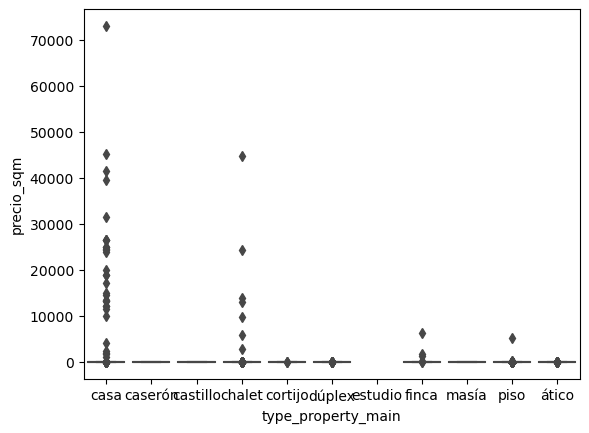

In [323]:
for zonei, zonedf in df_outliers.groupby([ "comunidad_autonoma"]):#.agg({"precio":[q1,q3]})
    sns.boxplot(data=zonedf, x="type_property_main", y="precio_sqm")
    break


<AxesSubplot: xlabel='type_property_main', ylabel='precio'>

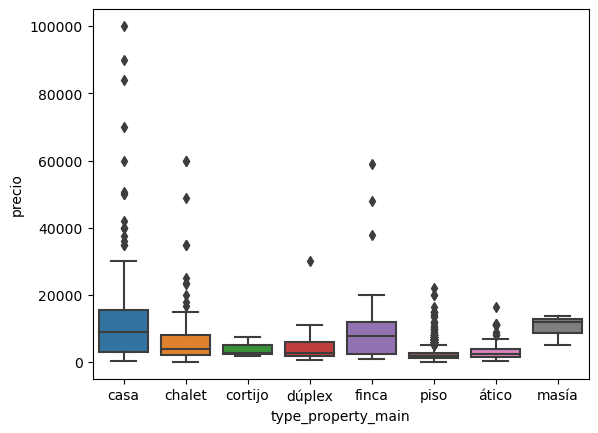

In [324]:
sns.boxplot(data=df_outliers[df_outliers["outliers_IQR"]==1], x ="type_property_main", y ="precio")